# インポート

In [1]:
import pandas as pd
from pathlib import Path

COMMON_DATA_DIR = Path("..","..","common","data")
RAWDF_DIR = COMMON_DATA_DIR/"rawdf"

##　データ加工

##　レース結果テーブルのデータ加工

In [2]:
df = pd.read_csv(RAWDF_DIR / "results.csv", sep="\t")

In [3]:
# ilocで行列の数を指定
df.iloc[:,0:10]

,race_id,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差
0,202301010101,1,5,5,サトミノキラリ,牡2,55.0,横山武史,1:09.5,NaN
1,202301010101,2,8,8,ベアゴーゴー,牝2,55.0,浜中俊,1:09.5,クビ
2,202301010101,3,6,6,ハピアーザンエバー,牡2,55.0,藤岡佑介,1:10.0,2.1/2
3,202301010101,4,4,4,デビルシズカチャン,牝2,55.0,ルメール,1:10.2,1.1/2
4,202301010101,5,1,1,ウィスピースノー,牝2,55.0,吉田隼人,1:10.3,1/2
...,...,...,...,...,...,...,...,...,...,...
47667,202310030812,8,1,1,リヴァーレ,牝3,53.0,太宰啓介,2:42.9,1.1/4
47668,202310030812,9,6,7,シュアーウィナー,牡5,55.0,川端海翼,2:43.5,3.1/2
47669,202310030812,10,2,2,アウローラシエル,牡3,55.0,和田竜二,2:43.6,3/4
47670,202310030812,11,4,4,ハイグッドエース,牡4,55.0,西塚洸二,2:43.7,3/4


In [4]:
#以下、各列において数値型になっている確認。そうでなければ加工していく
df["着順"]

0         1
1         2
2         3
3         4
4         5
         ..
47667     8
47668     9
47669    10
47670    11
47671    12
Name: 着順, Length: 47672, dtype: object

In [13]:
# dtyopeがobjectになっている。機械学習に通すには数字の型にする必要がある。
普通にやるとnumeric関数によりエラーを欠損値として処理するように指定
df["rank"] = pd.to_numeric(df["着順"], errors="coerce")
df["rank"].value_counts(dropna=False)

rank
3.0     3460
1.0     3459
2.0     3456
4.0     3456
5.0     3456
6.0     3443
7.0     3424
8.0     3367
9.0     3259
10.0    3101
11.0    2895
12.0    2637
13.0    2342
14.0    2047
15.0    1708
16.0    1279
NaN      399
17.0     280
18.0     204
Name: count, dtype: int64

In [15]:
df.dropna(subset=["rank"],inplace=True)

In [16]:
df["rank"].value_counts(dropna=False)

rank
3.0     3460
1.0     3459
2.0     3456
4.0     3456
5.0     3456
6.0     3443
7.0     3424
8.0     3367
9.0     3259
10.0    3101
11.0    2895
12.0    2637
13.0    2342
14.0    2047
15.0    1708
16.0    1279
17.0     280
18.0     204
Name: count, dtype: int64

In [17]:
df["馬番"].astype(int)

0        5
1        8
2        6
3        4
4        1
        ..
47667    1
47668    7
47669    2
47670    4
47671    5
Name: 馬番, Length: 47273, dtype: int64

In [19]:
df["性齢"].str[0].value_counts()

性齢
牡    25038
牝    19922
セ     2313
Name: count, dtype: int64

In [24]:
#ラベルエンコーディング：カテゴリ変数を整数にマッピングするデータ加工手法
sex_mapping = {"牡":0, "牝":1, "セ":2}

In [26]:
df["性齢"].str[0].map(sex_mapping).value_counts()

性齢
0    25038
1    19922
2     2313
Name: count, dtype: int64

In [27]:
df["性齢"].str[1:].astype(int)

0        2
1        2
2        2
3        2
4        2
        ..
47667    3
47668    5
47669    3
47670    4
47671    3
Name: 性齢, Length: 47273, dtype: int64

In [28]:
df["斤量"]

0        55.0
1        55.0
2        55.0
3        55.0
4        55.0
         ... 
47667    53.0
47668    55.0
47669    55.0
47670    55.0
47671    52.0
Name: 斤量, Length: 47273, dtype: float64

In [29]:
# １０列目意向を確認
df.iloc[:,10:20]

,単勝,人気,馬体重,調教師,horse_id,jockey_id,trainer_id,owner_id,rank
0,1.2,1.0,452(-4),[東] 鈴木伸尋,2021101429,1170,1026,1026,1.0
1,4.1,2.0,454(+2),[東] 杉浦宏昭,2021105872,1115,1008,1008,2.0
2,59.9,6.0,438(-6),[西] 羽月友彦,2021106854,1093,1091,1091,3.0
3,16.6,3.0,450(+2),[西] 武幸四郎,2021105553,5339,1160,1160,4.0
4,23.9,5.0,434(-10),[西] 今野貞一,2021100648,1095,1128,1128,5.0
...,...,...,...,...,...,...,...,...,...
47667,62.8,11.0,394(+2),[西] 松永幹夫,2020105644,1037,1092,1092,8.0
47668,125.6,12.0,470(-4),[西] 安田隆行,2018106584,1195,438,438,9.0
47669,9.8,5.0,496(+8),[西] 森田直行,2020101781,1018,1142,1142,10.0
47670,37.2,10.0,440(-2),[西] 大根田裕,2019106647,1200,1032,1032,11.0


In [30]:
df["単勝"]

0          1.2
1          4.1
2         59.9
3         16.6
4         23.9
         ...  
47667     62.8
47668    125.6
47669      9.8
47670     37.2
47671      6.2
Name: 単勝, Length: 47273, dtype: object

In [32]:
df["単勝"].astype(float)

0          1.2
1          4.1
2         59.9
3         16.6
4         23.9
         ...  
47667     62.8
47668    125.6
47669      9.8
47670     37.2
47671      6.2
Name: 単勝, Length: 47273, dtype: float64

In [33]:
df["人気"].astype(int)

0         1
1         2
2         6
3         3
4         5
         ..
47667    11
47668    12
47669     5
47670    10
47671     4
Name: 人気, Length: 47273, dtype: int64

In [37]:
df["weight"] = df["馬体重"].str.extract(r"(\d+)").astype(int)
df['weight']

0        452
1        454
2        438
3        450
4        434
        ... 
47667    394
47668    470
47669    496
47670    440
47671    442
Name: weight, Length: 47273, dtype: int64

In [40]:
# 馬体重増減の部分も抜き出す
df["馬体重"].str.extract(r"\((.+)\)").astype(int)
df["weight_diff"] = df["馬体重"].str.extract(r"\((.+)\)").astype(int)
df["weight_diff"]

0        -4
1         2
2        -6
3         2
4       -10
         ..
47667     2
47668    -4
47669     8
47670    -2
47671     6
Name: weight_diff, Length: 47273, dtype: int64

In [5]:
df["枠番"]

0        5
1        8
2        6
3        4
4        1
        ..
47667    1
47668    6
47669    2
47670    4
47671    5
Name: 枠番, Length: 47672, dtype: int64

In [7]:
# 馬テーブルのデータ抽出
df = pd.read_csv(RAWDF_DIR/"horse_results.csv", sep="\t")

In [ ]:
df.iloc[:,10:20]

,オッズ,人気,着順,騎手,斤量,距離,馬場,馬場指数,タイム,着差
0,3.8,2.0,9,津村明秀,57.0,芝1400,良,**,1:21.8,0.2
1,1.9,1.0,1,津村明秀,56.0,芝1400,良,**,1:19.7,-0.5
2,3.0,2.0,2,津村明秀,55.0,芝1400,良,**,1:22.0,0.4
3,11.3,5.0,2,津村明秀,54.0,芝1400,良,**,1:20.3,0.0
4,75.3,11.0,13,内田博幸,57.0,芝1600,稍,**,1:35.3,0.9
...,...,...,...,...,...,...,...,...,...,...
212935,1.3,1.0,1,藤原幹生,56.0,ダ1400,良,**,1:33.1,-0.5
212936,8.2,4.0,3,藤原幹生,56.0,ダ1400,良,**,1:30.8,0.4
212937,9.8,4.0,5,藤原幹生,56.0,ダ800,重,**,0:51.1,2.3
212938,47.5,13.0,14,松若風馬,56.0,ダ1700,良,**,1:49.4,3.4


In [10]:
df.iloc[:,0:10]

,horse_id,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番
0,2021101429,2024/11/09,5東京3,晴,10.0,奥多摩S(3勝クラス),NaN,14,5.0,8
1,2021101429,2024/10/06,4東京2,曇,8.0,3歳以上2勝クラス,NaN,13,6.0,8
2,2021101429,2024/09/01,3新潟8,晴,9.0,飯豊特別(2勝クラス),NaN,7,7.0,7
3,2021101429,2024/08/10,3新潟1,晴,10.0,新発田城特別(2勝クラス),NaN,14,8.0,13
4,2021101429,2024/04/06,3中山5,曇,11.0,ニュージーランドT(GII),NaN,16,8.0,16
...,...,...,...,...,...,...,...,...,...,...
212935,2020102750,2023/12/27,笠松,晴,3.0,C21組,NaN,7,5.0,5
212936,2020102750,2023/12/06,笠松,晴,2.0,マックル賞(C),NaN,8,1.0,1
212937,2020102750,2023/11/07,笠松,曇,1.0,C24組,NaN,7,4.0,4
212938,2020102750,2023/09/03,3小倉8,晴,6.0,3歳未勝利,NaN,16,7.0,13


In [11]:
df["日付"]

0         2024/11/09
1         2024/10/06
2         2024/09/01
3         2024/08/10
4         2024/04/06
             ...    
212935    2023/12/27
212936    2023/12/06
212937    2023/11/07
212938    2023/09/03
212939    2023/09/03
Name: 日付, Length: 212940, dtype: object

In [12]:
pd.to_datetime(df["日付"])

0        2024-11-09
1        2024-10-06
2        2024-09-01
3        2024-08-10
4        2024-04-06
            ...    
212935   2023-12-27
212936   2023-12-06
212937   2023-11-07
212938   2023-09-03
212939   2023-09-03
Name: 日付, Length: 212940, dtype: datetime64[ns]

In [14]:
df["天気"].value_counts()

天気
晴     126248
曇      64863
雨      13240
小雨      7747
雪        176
小雪       174
Name: count, dtype: int64

In [3]:
from feature_producing import FeatureMaker
%load_ext autoreload


In [16]:
%autoreload

In [4]:
fm = FeatureMaker()
fm.results

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,umaban,wakuban,tansyo_odds,popularity,kinryou,sex,age,weight,weight_diff
0,202301010101,2021100648,1095,1128,1128,5,1,1,23.9,5,55.0,1,2,434,-10
1,202301010101,2021100159,1157,1186,1186,6,2,2,61.8,7,55.0,0,2,454,-6
2,202301010101,2021100265,1197,1192,1192,7,3,3,18.8,4,53.0,1,2,404,-2
3,202301010101,2021105553,5339,1160,1160,4,4,4,16.6,3,55.0,1,2,450,2
4,202301010101,2021101429,1170,1026,1026,1,5,5,1.2,1,55.0,0,2,452,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,1161,1,8,6,3.5,1,53.0,1,4,442,-2
47269,202310030812,2020103754,1116,1104,1104,6,9,7,15.2,8,55.0,0,3,468,0
47270,202310030812,2020100400,1193,1092,1092,4,10,7,23.1,9,50.0,1,3,458,6
47271,202310030812,2020103663,732,1092,1092,2,11,8,5.0,3,55.0,2,3,486,-6


In [5]:
# 特徴量作成の実行
fm.create_baselog()
fm.agg_horse_n_races()

In [5]:
fm.make_features()

,race_id,horse_id,date,jockey_id,trainer_id,owner_id,rank,umaban,wakuban,tansyo_odds,...,race_class,place,rank_3races,prize_3races,rank_5races,prize_5races,rank_10races,prize_10races,rank_1000races,prize_1000races
0,202301010101,2021100648,2023-07-22,1095,1128,1128,5,1,1,23.9,...,1,1,4.500000,77.500000,4.5,77.5,4.500000,77.500000,4.500000,77.500000
1,202301010101,2021100159,2023-07-22,1157,1186,1186,6,2,2,61.8,...,1,1,8.000000,0.000000,8.0,0.0,8.000000,0.000000,8.000000,0.000000
2,202301010101,2021100265,2023-07-22,1197,1192,1192,7,3,3,18.8,...,1,1,5.000000,72.000000,5.0,72.0,5.000000,72.000000,5.000000,72.000000
3,202301010101,2021105553,2023-07-22,5339,1160,1160,4,4,4,16.6,...,1,1,4.000000,110.000000,4.0,110.0,4.000000,110.000000,4.000000,110.000000
4,202301010101,2021101429,2023-07-22,1170,1026,1026,1,5,5,1.2,...,1,1,2.000000,290.000000,2.0,290.0,2.000000,290.000000,2.000000,290.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,2023-09-03,1208,1161,1161,1,8,6,3.5,...,2,10,6.666667,0.000000,5.4,64.0,6.000000,44.000000,5.058824,102.823529
47269,202310030812,2020103754,2023-09-03,1116,1104,1104,6,9,7,15.2,...,2,10,8.000000,40.000000,6.0,145.0,6.125000,90.625000,6.125000,90.625000
47270,202310030812,2020100400,2023-09-03,1193,1092,1092,4,10,7,23.1,...,2,10,8.000000,0.000000,8.8,0.0,8.800000,0.000000,8.800000,0.000000
47271,202310030812,2020103663,2023-09-03,732,1092,1092,2,11,8,5.0,...,2,10,5.666667,61.666667,6.2,97.0,5.666667,123.222222,5.666667,123.222222


# 学習

#   機械学習モデルLightGBMを使って学習を行い、単勝馬券の予測をしてみる

In [6]:
features = fm.make_features()

In [10]:
features.columns

Index(['race_id', 'horse_id', 'date', 'jockey_id', 'trainer_id', 'owner_id',
       'rank', 'umaban', 'wakuban', 'tansyo_odds', 'popularity', 'kinryou',
       'sex', 'age', 'weight', 'weight_diff', 'race_type', 'around',
       'course_len', 'weather', 'ground_state', 'race_class', 'place',
       'rank_3races', 'prize_3races', 'rank_5races', 'prize_5races',
       'rank_10races', 'prize_10races', 'rank_1000races', 'prize_1000races'],
      dtype='object')

In [7]:
features_cols = [
    'horse_id', 
    'jockey_id',
    'trainer_id', 
    'umaban',
    'wakuban', 
    'tansyo_odds', 
    'popularity', 
    'kinryou',
    'sex', 
    'age', 
    'weight', 
    'weight_diff', 
    'race_type', 
    'around',
    'course_len', 
    'weather', 
    'ground_state', 
    'race_class', 
    'place',
    'rank_3races', 
    'prize_3races',
    'rank_5races', 
    'prize_5races',
    'rank_10races', 
    'prize_10races', 
    'rank_1000races', 
    'prize_1000races'
]

In [8]:
# 説明変数を定義する。機械学習モデルに入力して予測材料として使うもの
X = features[features_cols]


In [9]:
# 目的変数を定義する。機械学習モデルが予測する対象
Y = (features["rank"]  == 1).astype(int)

## ホールドアウト法

    データを学習データと検証データに分ける

In [8]:
# 具体的にどのようなコードを書いていけばいいか
# ホールドアウト法を使ってデータを分割する
features["target"] = (features["rank"]  == 1).astype(int)


In [9]:
train_df = features.query("date < '2023-10-01'")
test_df = features.query("date >= '2023-10-01'")

In [18]:
len(train_df), len(test_df)

(35524, 11749)

## LightGBMによる学習

In [10]:
import lightgbm as lgb

# データセットの作成
lgb_train = lgb.Dataset(
    train_df[features_cols], train_df["target"]
)
lgb_eval = lgb.Dataset(
    test_df[features_cols], test_df["target"], 
)

# ハイパーパラメータの設定
params = {
    'objective': 'binary', #二値分類
    'metric': 'binary_logloss', # 予測誤差
    "random_state": 100 , #実行ごとに同じデータを得るための設定
}

# 学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[lgb.log_evaluation()],
)

[LightGBM] [Info] Number of positive: 2595, number of negative: 32929
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2932
[LightGBM] [Info] Number of data points in the train set: 35524, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073049 -> initscore=-2.540767
[LightGBM] [Info] Start training from score -2.540767
[1]	training's binary_logloss: 0.246314	valid_1's binary_logloss: 0.248995
[2]	training's binary_logloss: 0.236904	valid_1's binary_logloss: 0.240828
[3]	training's binary_logloss: 0.230053	valid_1's binary_logloss: 0.234352
[4]	training's binary_logloss: 0.2246	valid_1's binary_logloss: 0.22962
[5]	training's binary_logloss: 0.22007	valid_1's binary_logloss: 0.225763
[6]	training's binary_logloss: 0.216377	valid_1's binary_logloss: 0.2228

# オフライン評価
## 的中率、回収率を見てみる

In [24]:
# テストデータに対して予測をしてみる
model.predict(test_df[features_cols])

array([0.43141992, 0.00094139, 0.00158458, ..., 0.0004729 , 0.00332207,
       0.00076629])

In [28]:
# 2重括弧 [[...]]:複数列を DataFrame として取り出すため。
# copy():抽出したデータを元のデータから切り離し、意図しない影響を防ぐため。

evalulation_df = test_df[
    [   
    "race_id",
    "horse_id",
    "rank", 
    "target",
    "tansyo_odds",
    "popularity",
    ]
        ].copy()

evalulation_df

,race_id,horse_id,rank,target,tansyo_odds,popularity
6254,202303030101,2021100761,10,0,2.1,1
6255,202303030101,2021106736,14,0,398.2,15
6256,202303030101,2021107376,15,0,177.5,12
6257,202303030101,2021109129,7,0,94.7,7
6258,202303030101,2021103986,12,0,173.0,11
...,...,...,...,...,...,...
43507,202309050912,2019103898,2,0,5.9,3
43508,202309050912,2019106102,8,0,11.9,6
43509,202309050912,2017102603,16,0,347.8,14
43510,202309050912,2019100653,13,0,94.7,12


In [29]:
evalulation_df["pred"] = model.predict(test_df[features_cols])

In [30]:
evalulation_df

,race_id,horse_id,rank,target,tansyo_odds,popularity,pred
6254,202303030101,2021100761,10,0,2.1,1,0.431420
6255,202303030101,2021106736,14,0,398.2,15,0.000941
6256,202303030101,2021107376,15,0,177.5,12,0.001585
6257,202303030101,2021109129,7,0,94.7,7,0.038925
6258,202303030101,2021103986,12,0,173.0,11,0.001430
...,...,...,...,...,...,...,...
43507,202309050912,2019103898,2,0,5.9,3,0.110488
43508,202309050912,2019106102,8,0,11.9,6,0.061910
43509,202309050912,2017102603,16,0,347.8,14,0.000473
43510,202309050912,2019100653,13,0,94.7,12,0.003322


In [31]:
# predの値が一番高いものに単勝馬券をかける場合を考える
(
    evalulation_df
    .sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(1)
)

,race_id,horse_id,rank,target,tansyo_odds,popularity,pred
19258,202305050812,2019105219,1,1,1.3,1,0.908733
17919,202305040911,2019105219,1,1,1.3,1,0.830475
18582,202305050501,2021110161,1,1,1.5,1,0.829876
33905,202308020204,2017104652,2,0,1.4,1,0.825309
35590,202308030408,2020105599,1,1,1.2,1,0.820191
...,...,...,...,...,...,...,...
42620,202309050409,2018110137,2,0,3.0,2,0.134745
17925,202305040912,2020103790,8,0,6.0,3,0.131869
34981,202308020910,2018104638,15,0,8.7,5,0.117771
31710,202307040611,2019105859,2,0,4.7,1,0.115275


In [33]:
bet_df = (
    evalulation_df
    .sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(1)
)
bet_df

,race_id,horse_id,rank,target,tansyo_odds,popularity,pred
19258,202305050812,2019105219,1,1,1.3,1,0.908733
17919,202305040911,2019105219,1,1,1.3,1,0.830475
18582,202305050501,2021110161,1,1,1.5,1,0.829876
33905,202308020204,2017104652,2,0,1.4,1,0.825309
35590,202308030408,2020105599,1,1,1.2,1,0.820191
...,...,...,...,...,...,...,...
42620,202309050409,2018110137,2,0,3.0,2,0.134745
17925,202305040912,2020103790,8,0,6.0,3,0.131869
34981,202308020910,2018104638,15,0,8.7,5,0.117771
31710,202307040611,2019105859,2,0,4.7,1,0.115275


In [34]:
# 的中率
bet_df["target"].mean()

0.3368055555555556

In [42]:
# 回収率
return_ = ((bet_df["target"] == 1)* bet_df["tansyo_odds"]).sum()
# かけた金額
cost = len(bet_df)

return_ / cost

0.9016203703703703

In [44]:
# 1番人気にかけたときの回収率はこれより精度が低くなっているか
bet_df = (
    evalulation_df
    .sort_values("popularity" ,ascending=True)
    .groupby("race_id")
    .head(1)
)
bet_df

,race_id,horse_id,rank,target,tansyo_odds,popularity,pred
6254,202303030101,2021100761,10,0,2.1,1,0.431420
41989,202309040903,2021101237,3,0,3.5,1,0.289028
17730,202305040807,2020106930,1,1,3.1,1,0.278915
17719,202305040806,2020104945,9,0,2.6,1,0.319121
17710,202305040805,2021105578,1,1,3.0,1,0.337750
...,...,...,...,...,...,...,...
6531,202303030210,2020103697,5,0,2.5,1,0.272088
6428,202303030201,2021100641,2,0,1.7,1,0.546313
6565,202303030212,2020101271,1,1,2.3,1,0.403629
42620,202309050409,2018110137,2,0,3.0,2,0.134745


In [45]:
# 的中率
bet_df["target"].mean()

0.33101851851851855

In [47]:
# 回収率
return_ = ((bet_df["target"] == 1)* bet_df["tansyo_odds"]).sum()
return_ / cost

0.798726851851852

In [2]:
# １番人気と違う馬の回収率
bet_df = (
    evalulation_df
    .sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(1)
    .query("popularity != 1")
)
bet_df

NameError: name 'evalulation_df' is not defined

In [1]:
# 的中率
bet_df["target"].mean()

NameError: name 'bet_df' is not defined

In [51]:
# 回収率
return_ = ((bet_df["target"] == 1)* bet_df["tansyo_odds"]).sum()
cost = len(bet_df)
return_ / cost

1.2347305389221557

# Lightgbmの仕組み

In [14]:
import graphviz
print('graphviz version: {}'.format(graphviz.__version__))


graphviz version: 0.20.3


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

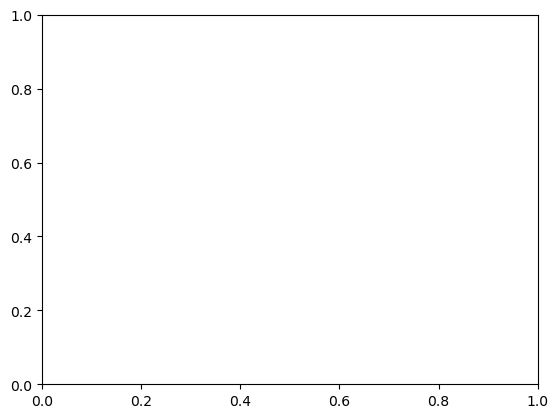

In [12]:
lgb.plot_tree(model)

In [15]:
import scraping

ModuleNotFoundError: No module named 'scraping'

# 予測時の処理

##　レース前準備

In [19]:
import preprocessing

horse_results_preprocessed = preprocessing.process_horse_results(
    save_filename = "horse_results_prediction.csv"
)

In [1]:
from feature_producing_prediction import PredictionFeatureMaker
%load_ext autoreload

In [10]:
%autoreload

In [2]:

# 特徴量作成
pfm = PredictionFeatureMaker()

In [3]:
# 馬の過去成績集計を先に行っておく
pfm.create_baselog()
pfm.agg_horse_n_races()

In [11]:
features = pfm.make_features(
    race_id ="202306050811",
    skip_agg_horse=True
)

fetching shubuta page html...


c:\Users\Onoe Daichi\Downloads\競馬AI\keiba_ai\3.0.0\src\feature_producing_prediction.py:117: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html)[0]


In [12]:
features

,date,race_id,horse_id,jockey_id,trainer_id,umaban,wakuban,tansho_odds,popularity,impost,...,race_class,place,rank_3races,prize_3races,rank_5races,prize_5races,rank_10races,prize_10races,rank_1000races,prize_1000races
0,2023-12-24,202306050811,2019105283,666,1061,5,3,5.2,2,58.0,...,5,6,4.000000,4597.000000,7.0,2758.20,4.300000,5168.610000,4.000000,4762.372727
1,2023-12-24,202306050811,2019104740,5339,1118,16,8,8.6,7,56.0,...,5,6,2.666667,8167.400000,2.4,8833.12,2.100000,6372.090000,2.090909,5818.263636
2,2023-12-24,202306050811,2018103559,1140,1127,4,2,8.3,6,58.0,...,5,6,2.666667,4838.466667,5.6,2903.08,3.700000,8008.850000,3.882353,5519.205882
3,2023-12-24,202306050811,2019105346,1170,1157,10,5,3.6,1,58.0,...,5,6,2.000000,12259.400000,2.8,8715.52,3.800000,5616.450000,3.333333,4823.983333
4,2023-12-24,202306050811,2018105165,1126,1055,2,1,44.6,8,58.0,...,5,6,6.333333,0.000000,5.2,3622.32,3.900000,4919.500000,3.384615,4206.515385
5,2023-12-24,202306050811,2020103532,5366,1070,13,7,7.1,5,56.0,...,5,6,1.666667,16744.166667,2.0,11261.06,1.833333,9500.883333,1.833333,9500.883333
6,2023-12-24,202306050811,2017101431,5641,1038,12,6,171.9,14,56.0,...,5,6,7.333333,0.000000,5.8,0.00,7.300000,614.700000,5.476190,1675.719048
7,2023-12-24,202306050811,2020102899,1088,1038,1,1,6.5,4,56.0,...,5,6,2.333333,6799.466667,1.8,9393.62,1.666667,7944.683333,1.666667,7944.683333
8,2023-12-24,202306050811,2020103458,1174,1061,11,6,93.2,11,54.0,...,5,6,2.666667,4327.933333,2.6,3768.24,2.285714,2805.885714,2.285714,2805.885714
9,2023-12-24,202306050811,2017104691,1075,1150,3,2,193.2,16,56.0,...,5,6,2.000000,2191.766667,4.2,1506.40,5.600000,1039.350000,5.379310,616.182759


In [ ]:
prediction.predict

# シミュレーション

## 学習の実行とと払い戻しテーブルを持ってくる

In [27]:
from training import Trainer
%load_ext autoreload

trainer = Trainer()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%autoreload

In [29]:
evalulation_df = trainer.run(test_start_date="2023-10-01")

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.214913
[200]	valid_0's binary_logloss: 0.20693
[300]	valid_0's binary_logloss: 0.204984
[400]	valid_0's binary_logloss: 0.204359
[500]	valid_0's binary_logloss: 0.204145
[600]	valid_0's binary_logloss: 0.204128
Early stopping, best iteration is:
[584]	valid_0's binary_logloss: 0.204084
-------------------- result --------------------
test_df's binary_logloss: 0.2040837339179607


In [30]:
evalulation_df

,race_id,horse_id,target,rank,tansyo_odds,popularity,umaban,pred
6254,202303030101,2021100761,0,10,2.1,1,1,0.331286
6255,202303030101,2021106736,0,14,398.2,15,2,0.001713
6256,202303030101,2021107376,0,15,177.5,12,3,0.008258
6257,202303030101,2021109129,0,7,94.7,7,4,0.008356
6258,202303030101,2021103986,0,12,173.0,11,5,0.002058
...,...,...,...,...,...,...,...,...
43507,202309050912,2019103898,0,2,5.9,3,12,0.145437
43508,202309050912,2019106102,0,8,11.9,6,13,0.081281
43509,202309050912,2017102603,0,16,347.8,14,14,0.002069
43510,202309050912,2019100653,0,13,94.7,12,15,0.006631


In [42]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("..","data")
PREPROCESSED_DIR = DATA_DIR/"01_preprocessed"

return_tables = pd .read_pickle(PREPROCESSED_DIR/"return_tables.pickle")
return_tables

,bet_type,umaban,return
race_id,,,
202301010101,単勝,[5],120
202301010101,複勝,[5],100
202301010101,複勝,[8],110
202301010101,複勝,[6],310
202301010101,馬連,"[5, 8]",170
...,...,...,...
202310030812,ワイド,"[6, 8]",410
202310030812,ワイド,"[6, 11]",470
202310030812,馬単,"[8, 11]",1580


## 馬券種ごとに予測スコア上位n着で、それぞれboxを買う場合を考える

In [71]:
bet_df = (
    evalulation_df.sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(5)
    .groupby("race_id")["umaban"]
    .apply(lambda x:list(x.astype(str)))
    .reset_index()
)
bet_df

,race_id,umaban
0,202303030101,"[1, 10, 8, 15, 7]"
1,202303030102,"[7, 1, 11, 2, 5]"
2,202303030103,"[3, 12, 9, 4, 10]"
3,202303030104,"[9, 4, 1, 6, 8]"
4,202303030105,"[2, 12, 14, 4, 1]"
...,...,...
859,202309050908,"[8, 14, 4, 12, 15]"
860,202309050909,"[16, 13, 5, 15, 11]"
861,202309050910,"[1, 7, 6, 9, 10]"
862,202309050911,"[10, 15, 5, 11, 12]"


In [36]:
# groupby、applyなど後でchatgptで機能確認
group_df =  (
    evalulation_df.sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(5)
    .groupby("race_id")
    # .apply(lambda x:list(x))
)

In [37]:
for key,df in group_df:
    print(df)
    break

           race_id    horse_id  target  rank  tansyo_odds  popularity  umaban  \
6254  202303030101  2021100761       0    10          2.1           1       1   
6263  202303030101  2021102352       0     4          4.6           2      10   
6261  202303030101  2021103812       1     1          4.7           3       8   
6268  202303030101  2021103371       0     3          8.5           4      15   
6260  202303030101  2021103306       0     2         13.2           5       7   

          pred  
6254  0.331286  
6263  0.142364  
6261  0.118694  
6268  0.101576  
6260  0.075377  


In [73]:
df = bet_df.merge(return_tables,on="race_id")
df

,race_id,umaban_x,bet_type,umaban_y,return
0,202303030101,"[1, 10, 8, 15, 7]",単勝,[8],470
1,202303030101,"[1, 10, 8, 15, 7]",複勝,[8],220
2,202303030101,"[1, 10, 8, 15, 7]",複勝,[7],300
3,202303030101,"[1, 10, 8, 15, 7]",複勝,[15],290
4,202303030101,"[1, 10, 8, 15, 7]",枠連,"[4, 5]",1480
...,...,...,...,...,...
10333,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[2, 5]",1380
10334,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[5, 12]",460
10335,202309050912,"[5, 6, 12, 1, 13]",馬単,"[2, 12]",29610
10336,202309050912,"[5, 6, 12, 1, 13]",三連複,"[2, 5, 12]",7370


In [74]:
x = df.iloc[2]["umaban_x"]
x


['1', '10', '8', '15', '7']

In [62]:
y = df.iloc[2]["umaban_y"]
y

['7']

In [75]:
# 部分集合を計算するためにset関数より集合にする
# set(y)
set(x)

{'1', '10', '15', '7', '8'}

In [76]:
set(y).issubset(set(x))

True

In [77]:
df["hit"] = df.apply(
    lambda x: set(x["umaban_y"]).issubset(set(x["umaban_x"])),axis=1
    )
df

,race_id,umaban_x,bet_type,umaban_y,return,hit
0,202303030101,"[1, 10, 8, 15, 7]",単勝,[8],470,True
1,202303030101,"[1, 10, 8, 15, 7]",複勝,[8],220,True
2,202303030101,"[1, 10, 8, 15, 7]",複勝,[7],300,True
3,202303030101,"[1, 10, 8, 15, 7]",複勝,[15],290,True
4,202303030101,"[1, 10, 8, 15, 7]",枠連,"[4, 5]",1480,False
...,...,...,...,...,...,...
10333,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[2, 5]",1380,False
10334,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[5, 12]",460,True
10335,202309050912,"[5, 6, 12, 1, 13]",馬単,"[2, 12]",29610,False
10336,202309050912,"[5, 6, 12, 1, 13]",三連複,"[2, 5, 12]",7370,False


In [79]:
(
    df.groupby(["race_id", "bet_type"])["hit"]
    .max()
    .groupby("bet_type")
    .mean()
)

bet_type
ワイド    0.857639
三連単    0.366898
三連複    0.366898
単勝     0.837963
枠連     0.187651
複勝     0.987269
馬単     0.605324
馬連     0.605324
Name: hit, dtype: float64

In [81]:
df["hit_return"] = df["return"]*df["hit"]
df

,race_id,umaban_x,bet_type,umaban_y,return,hit,hit_return
0,202303030101,"[1, 10, 8, 15, 7]",単勝,[8],470,True,470
1,202303030101,"[1, 10, 8, 15, 7]",複勝,[8],220,True,220
2,202303030101,"[1, 10, 8, 15, 7]",複勝,[7],300,True,300
3,202303030101,"[1, 10, 8, 15, 7]",複勝,[15],290,True,290
4,202303030101,"[1, 10, 8, 15, 7]",枠連,"[4, 5]",1480,False,0
...,...,...,...,...,...,...,...
10333,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[2, 5]",1380,False,0
10334,202309050912,"[5, 6, 12, 1, 13]",ワイド,"[5, 12]",460,True,460
10335,202309050912,"[5, 6, 12, 1, 13]",馬単,"[2, 12]",29610,False,0
10336,202309050912,"[5, 6, 12, 1, 13]",三連複,"[2, 5, 12]",7370,False,0


In [83]:
import math

math.comb(5,2)

10

In [89]:
n_bets_dict = {
    "単勝": 5,
    "複勝" : 5,
    "馬連" : math.comb(5,2),
    "ワイド": math.comb(5,2),
    "馬単" : math.perm(5,2),
    "三連複" : math.comb(5,3),
    "三連単" : math.perm(5,3),
}
n_bets_dict

{'単勝': 5, '複勝': 5, '馬連': 10, 'ワイド': 10, '馬単': 20, '三連複': 10, '三連単': 60}

In [88]:
agg_df = (
    df.groupby(["race_id", "bet_type"])["hit_return"]
    .sum()
    .reset_index()
)
agg_df

,race_id,bet_type,hit_return
0,202303030101,ワイド,2260
1,202303030101,三連単,21460
2,202303030101,三連複,4320
3,202303030101,単勝,470
4,202303030101,枠連,0
...,...,...,...
6869,202309050912,単勝,0
6870,202309050912,枠連,2990
6871,202309050912,複勝,360
6872,202309050912,馬単,0


In [92]:

agg_df["n_bets"] = agg_df["bet_type"].map(n_bets_dict)
agg_df

,race_id,bet_type,hit_return,n_bets
0,202303030101,ワイド,2260,10.0
1,202303030101,三連単,21460,60.0
2,202303030101,三連複,4320,10.0
3,202303030101,単勝,470,5.0
4,202303030101,枠連,0,NaN
...,...,...,...,...
6869,202309050912,単勝,0,5.0
6870,202309050912,枠連,2990,NaN
6871,202309050912,複勝,360,5.0
6872,202309050912,馬単,0,20.0


In [94]:
agg_df = agg_df.groupby("bet_type")[["hit_return","n_bets"]].sum()
agg_df

,hit_return,n_bets
bet_type,,
ワイド,727910,8640.0
三連単,4089020,51840.0
三連複,700100,8640.0
単勝,355890,4320.0
枠連,211830,0.0
複勝,361890,4320.0
馬単,1396410,17280.0
馬連,719840,8640.0


In [95]:
agg_df["hit_return"]/ agg_df["n_bets"]/100

bet_type
ワイド    0.842488
三連単    0.788777
三連複    0.810301
単勝     0.823819
枠連          inf
複勝     0.837708
馬単     0.808108
馬連     0.833148
dtype: float64

## クラスにまとめる

In [2]:
from evaluationing import Evaluator
%load_ext autoreload

In [43]:
%autoreload

In [44]:
evaluator = Evaluator()
agg_df = evaluator.box_top_n(n=2)

In [45]:
agg_df

,topn,bet_type,hitrate_model,returnrate_model
0,2,ワイド,0.340278,0.892593
1,2,単勝,0.548611,0.862674
2,2,複勝,0.841435,0.862095
3,2,馬単,0.179398,0.942824
4,2,馬連,0.179398,0.962153


In [42]:
agg_df =  agg_df.groupby("bet_type")[["hitrate_model","returnrate_model"]].sum()
agg_df

,hitrate_model,returnrate_model
bet_type,,
ワイド,0.340278,0.892593
単勝,0.548611,0.862674
複勝,0.841435,0.862095
馬単,0.179398,0.942824
馬連,0.179398,0.962153


In [26]:
agg_df.query("n_bets > 0")

,race_id,bet_type,hit_return,n_bets
3,202303030101,単勝,0,1.0
5,202303030101,複勝,0,1.0
11,202303030102,単勝,0,1.0
13,202303030102,複勝,110,1.0
19,202303030103,単勝,0,1.0
...,...,...,...,...
6855,202309050910,複勝,0,1.0
6861,202309050911,単勝,0,1.0
6863,202309050911,複勝,110,1.0
6869,202309050912,単勝,0,1.0


In [12]:
# return_table のコラムをumabanからwin_umabanに変更
import preprocessing
return_tables =  preprocessing.process_return_tables

In [16]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("..","data")
PREPROCESSED_DIR = DATA_DIR/"01_preprocessed"

return_tables = pd.read_pickle(PREPROCESSED_DIR/"return_tables.pickle")
return_tables

,bet_type,umaban,return
race_id,,,
202301010101,単勝,[5],120
202301010101,複勝,[5],100
202301010101,複勝,[8],110
202301010101,複勝,[6],310
202301010101,馬連,"[5, 8]",170
...,...,...,...
202310030812,ワイド,"[6, 8]",410
202310030812,ワイド,"[6, 11]",470
202310030812,馬単,"[8, 11]",1580


In [29]:
agg_df

,bet_type,hitrate_model,returnrate_model
0,ワイド,0.340278,0.892593
1,単勝,0.548611,0.862674
2,複勝,0.841435,0.862095
3,馬単,0.179398,0.942824
4,馬連,0.179398,0.962153


In [33]:
agg_popularity = evaluator.box_top_n(
    sort_col = "popularity",
    ascending = True,
    n=2,
    exp_name ="popularity"
    
)
agg_popularity

,bet_type,hitrate_popularity,returnrate_popularity
0,ワイド,0.324074,0.809606
1,単勝,0.543981,0.836285
2,複勝,0.842593,0.839410
3,馬単,0.170139,0.811748
4,馬連,0.170139,0.829977


In [35]:
pd.concat([agg_df, agg_popularity], axis=1).sort_index(axis=1)

,bet_type,bet_type,hitrate_model,hitrate_popularity,returnrate_model,returnrate_popularity
0,ワイド,ワイド,0.340278,0.324074,0.892593,0.809606
1,単勝,単勝,0.548611,0.543981,0.862674,0.836285
2,複勝,複勝,0.841435,0.842593,0.862095,0.839410
3,馬単,馬単,0.179398,0.170139,0.942824,0.811748
4,馬連,馬連,0.179398,0.170139,0.962153,0.829977


In [4]:
evaluator = Evaluator()


In [11]:
%autoreload

In [12]:
evaluator.summarize_box_top_n(n=1, save_filename="box_summary_top1.csv")

,bet_type,bet_type,hitrate_model,hitrate_pop,returnrate_model,returnrate_pop
0,単勝,単勝,0.328704,0.331019,0.797454,0.798727
1,複勝,複勝,0.635417,0.641204,0.835069,0.838194
